<a href="https://colab.research.google.com/github/wakuei095/AI/blob/main/B09090095_1105_%E9%BB%83%E6%B7%BB%E8%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


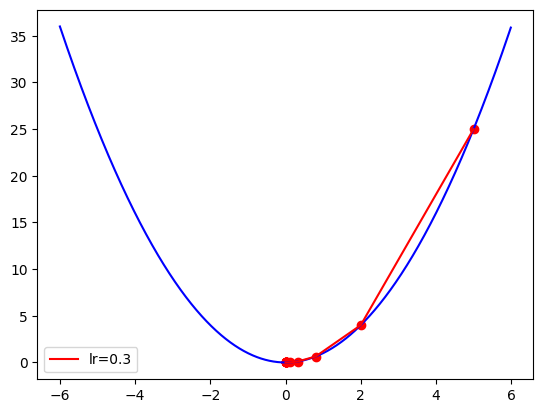

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點
        :param df: 目標函數的一階導函數
        :param epochs: 反覆運算週期
        :param lr: 學習率
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1
     """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # v表示x要改變的幅度
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

# Main
# 起始權重
x_start = 5
# 執行週期數
epochs = 15
# 學習率
lr = 0.3
# 梯度下降法
x = GD(x_start, dfunc, epochs, lr=lr)
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'  #繪製圖形
#plt.plot(line_x, line_y, c='b')
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))
plt.scatter(x, func(x), c=color, )
plt.legend() #顯示圖例

plt.show() #顯示圖表

In [2]:
from tensorflow import keras #定義模型的類別
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [3]:
mnist=keras.datasets.mnist #匯入數據集
(train_data, train_label), (test_data, test_label) = mnist.load_data() #載入數據集

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(type(train_data))
print(train_data.shape)
print(type(train_label))
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(train_label[0])
print(train_data[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

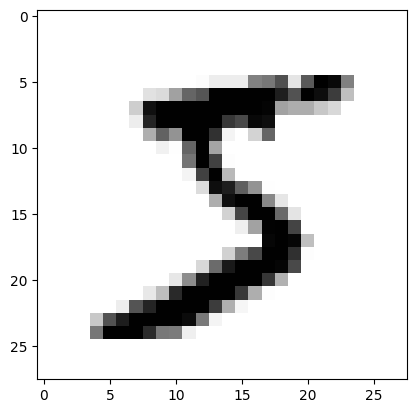

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0], cmap='binary') # 使用imshow顯示第一張訓練圖像
plt.show() #顯示圖像

In [7]:
model=Sequential()
model.add(Flatten())
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(train_data,train_label,epochs=20,batch_size=512) #訓練模型，設定20個epochs和每批512個樣本

score=model.evaluate(test_data, test_label) #評估模型
print(score[1]) #輸出測試數據

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5029 - loss: 24.3856
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7601 - loss: 0.9858
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8484 - loss: 0.6489
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8779 - loss: 0.5245
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8925 - loss: 0.4437
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9084 - loss: 0.3732
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9192 - loss: 0.3213
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9236 - loss: 0.3004
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9309 - loss: 0.2613
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9322 - loss: 0.2478
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9379 - loss: 0.2304
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential() #建立模型
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu')) #添加卷積層
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #添加扁平層
model.add(Dense(10, activation='softmax')) #添加全連接層
model.summary() #顯示模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #編譯模型

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

In [11]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512) #訓練模型，設定10個epochs和每批512個樣本

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.7268 - loss: 8.2351
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - accuracy: 0.9537 - loss: 0.3392
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.9727 - loss: 0.1258
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.9814 - loss: 0.0723
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.9867 - loss: 0.0509
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step - accuracy: 0.9898 - loss: 0.0333
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.9913 - loss: 0.0279
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.9939 - loss: 0.0193
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.9945 - loss: 0.0173
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.9945 - loss: 0.0154


In [12]:
score=model.evaluate(test_data, test_label) #評估模型
print(score[1]) #輸出測試數據

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.1349
0.9796000123023987


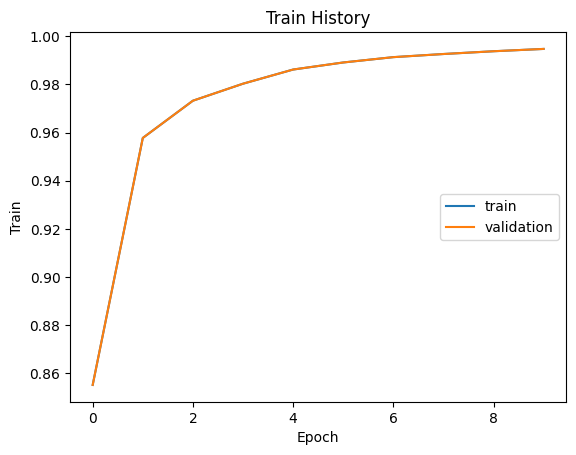

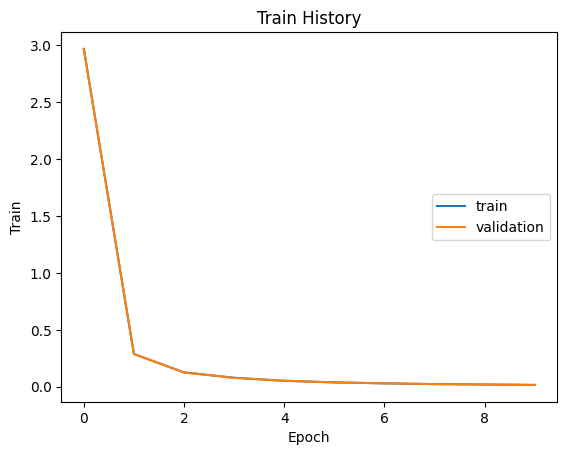

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,2,1,1,0,4,0,2,2
1,1,1121,2,2,2,2,1,2,2,0
2,1,4,1012,0,2,0,1,5,7,0
3,0,0,4,980,0,17,0,6,2,1
4,0,1,1,0,963,0,4,2,2,9
5,2,0,0,2,0,884,2,0,2,0
6,8,1,1,0,5,4,936,0,3,0
7,1,1,8,1,3,1,0,1008,2,3
8,5,2,2,2,2,2,2,1,952,4


In [13]:
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History') #圖表標題
    plt.ylabel('Train') #Y軸
    plt.xlabel('Epoch') #X軸
    plt.legend(['train', 'validation'], loc='center right') #標註圖例
    plt.show() #顯示圖表

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data) #使用模型進行預測
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict']) #使用pandas生成混淆矩陣

In [14]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential() #建立模型
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu')) #輸入形狀為32x32的RGB圖像
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) #表示以2x2的區域取最大值
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary() #顯示模型架構
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #編譯模型

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 727,114 (2.77 MB)

 Trainable params: 727,114 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<ipython-input-16-12bd91ba72b5>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


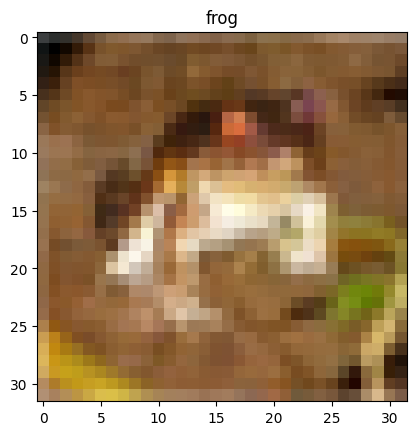

[6]


In [16]:
import matplotlib.pyplot as plt
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] #定義類別名稱
plt.imshow(train_data[0])  #顯示圖像
plt.title(category[int(train_label_original[0])])
plt.show() #顯示圖像
print(train_label_original[0]) #印出第一張圖像的標籤（整數形式）

In [17]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.1013 - loss: 19.9267
0.10109999775886536


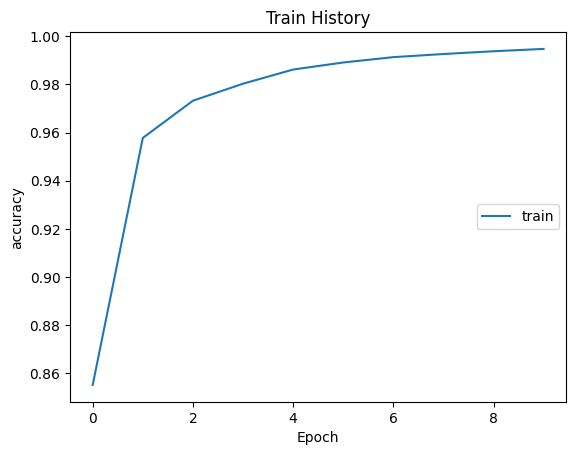

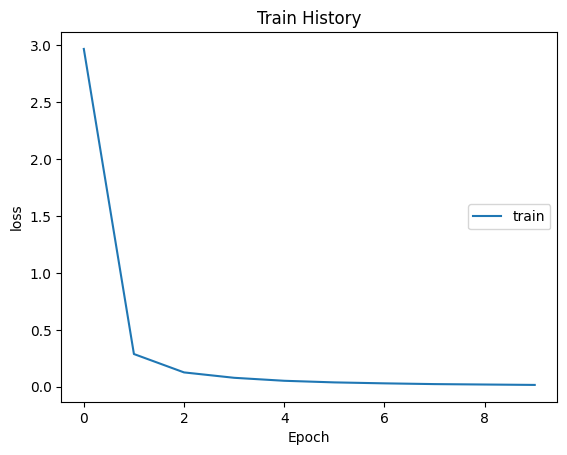

In [18]:
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')

In [19]:
# 訓練資料集Google 2012-2016的股價。1258筆
# 測試資料集Google 2017的股價。20筆
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv

--2024-11-05 13:05:49--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2024-11-05 13:05:50--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.01s   

2024-11-05 13:05:50 (5.11 MB/s) - ‘Google_Stock_Price_Train.csv’ saved [63488/63488]

--

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 讀取訓練資料集
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# 取出Open股票指數欄位值
training_set = dataset_train.iloc[:, 1:2].values
# Feature Scaling：把股票指數變成0-1之間的數字
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點

for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# 轉成numpy array的格式，以利輸入RNN
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
print(X_train.shape)
print(X_train[0])

(1198, 60, 1)
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]


In [22]:
#Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
#進行訓練
regressor.fit(X_train, y_train, epochs = 65, batch_size = 512)

Epoch 1/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 518ms/step - loss: 0.3297
Epoch 2/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 530ms/step - loss: 0.1344
Epoch 3/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step - loss: 0.0405
Epoch 4/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 834ms/step - loss: 0.0312
Epoch 5/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 817ms/step - loss: 0.0292
Epoch 6/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - loss: 0.0370
Epoch 7/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - loss: 0.0177
Epoch 8/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - loss: 0.0168
Epoch 9/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 924ms/step - loss: 0.0169
Epoch 10/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - loss: 0.0101
Epoch 11/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - loss: 0.0130
Epoch 12/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - loss: 0.0088
Epoch 13/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 708ms/step - loss: 0.0076
Epoch 14/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 775ms/step - loss: 0.0078
Epoch 15/65
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 527ms/step - loss: 0.0059
Epoch 16/65
3/3 ━━

In [24]:
#讀取2017股票測試資料集
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
#抓出OPEN股票指數欄位值
real_stock_price = dataset_test.iloc[:, 1:2].values

#抓出2017年前60天的資料
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) #Feature Scaling
X_test = []
for i in range(60, 80):  #timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#預測股票指數
predicted_stock_price = regressor.predict(X_test)
#把預測結果從0~1之間還原為原來的股票指數
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


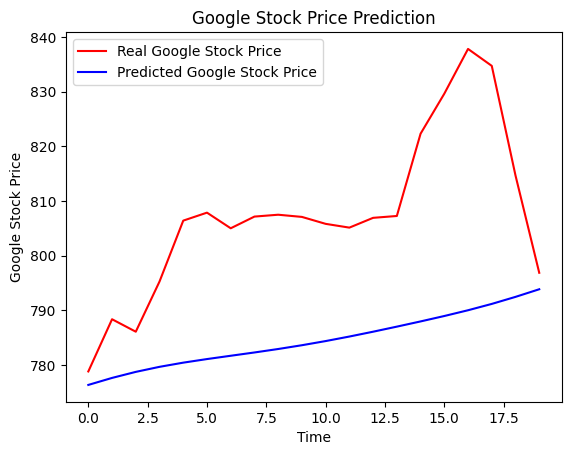

In [25]:
#Visualising the results
import matplotlib.pyplot as plt  #for畫圖用
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  #紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  #藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()